In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("student_performance.csv")

In [3]:
data.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


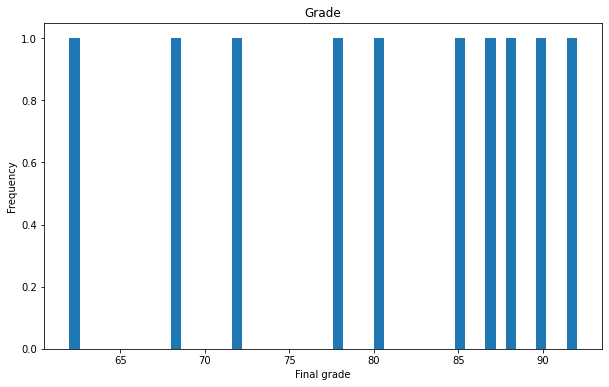

In [4]:
plt.figure(figsize=(10,6))
plt.hist(data["FinalGrade"],bins=50)
plt.title('Grade')
plt.xlabel('Final grade')
plt.ylabel('Frequency')
plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
Labelencoding=LabelEncoder()

In [7]:
data['Gender']=Labelencoding.fit_transform(data['Gender'])

In [8]:
data = pd.get_dummies(data, columns=['ParentalSupport'], drop_first=False)
data.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,ParentalSupport_High,ParentalSupport_Low,ParentalSupport_Medium
0,1,John,1,85,15,78,1,80,True,False,False
1,2,Sarah,0,90,20,85,2,87,False,False,True
2,3,Alex,1,78,10,65,0,68,False,True,False
3,4,Michael,1,92,25,90,3,92,True,False,False
4,5,Emma,0,88,18,82,2,85,False,False,True


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler=MinMaxScaler()
data[['AttendanceRate','StudyHoursPerWeek','PreviousGrade','FinalGrade']]=scaler.fit_transform(data[['AttendanceRate','StudyHoursPerWeek','PreviousGrade','FinalGrade']])

data.head()

c:\Users\muri-\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\muri-\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\muri-\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\muri-\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,ParentalSupport_High,ParentalSupport_Low,ParentalSupport_Medium
0,1,John,1,0.60,0.318182,0.600000,1,0.600000,True,False,False
1,2,Sarah,0,0.80,0.545455,0.833333,2,0.833333,False,False,True
2,3,Alex,1,0.32,0.090909,0.166667,0,0.200000,False,True,False
3,4,Michael,1,0.88,0.772727,1.000000,3,1.000000,True,False,False
4,5,Emma,0,0.72,0.454545,0.733333,2,0.766667,False,False,True


In [12]:
data[['ParentalSupport_High', 'ParentalSupport_Low', 'ParentalSupport_Medium']] = data[['ParentalSupport_High', 'ParentalSupport_Low', 'ParentalSupport_Medium']].astype(int)
data.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,ParentalSupport_High,ParentalSupport_Low,ParentalSupport_Medium
0,1,John,1,0.60,0.318182,0.600000,1,0.600000,1,0,0
1,2,Sarah,0,0.80,0.545455,0.833333,2,0.833333,0,0,1
2,3,Alex,1,0.32,0.090909,0.166667,0,0.200000,0,1,0
3,4,Michael,1,0.88,0.772727,1.000000,3,1.000000,1,0,0
4,5,Emma,0,0.72,0.454545,0.733333,2,0.766667,0,0,1


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
X=data.drop(['StudentID','Name','FinalGrade'],axis=1)
y=data['FinalGrade']

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
model=LinearRegression()

In [17]:
model.fit(X_train,y_train)

c:\Users\muri-\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\muri-\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\muri-\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


LinearRegression()

In [30]:
y_pred=model.predict(X_test)

c:\Users\muri-\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\muri-\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\muri-\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [28]:
from sklearn.metrics import r2_score,mean_squared_error

In [31]:
r2=r2_score(y_test,y_pred)
mean_squared_error_score=mean_squared_error(y_test,y_pred)
print(f'r2score:{r2}')
print(f'Mean squared error:{mean_squared_error_score}')

r2score:0.9177234328473098
Mean squared error:0.0051422854470431325
